# Question 1: -
# Write a program that takes a string as input, and counts the frequency of each word in the string, there might
# be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
# highest-frequency word.

# Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
# an explanation for the same.
# Example input - string = “write write write all the number from from from 1 to 100”
# Example output - 5
# Explanation - From the given string we can note that the most frequent words are “write” and “from” and
# the maximum value of both the values is “write” and its corresponding length is 5

In [ ]:
def find_highest_frequency_word_length(string):
  words=string.split()
  word_freq={}
  for word in words:
    word_freq[word]=word_freq.get(word,0)+1
  max_freq=max(word_freq.values())
  max_word_length=max(len(word)for word,freq in word_freq.items() if freq==max_freq)
  return max_word_length

In [ ]:

string = "write write write all the number from from from 1 to 100"
print(find_highest_frequency_word_length(string))



5


# Question 2: -
# Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
# he can remove just one character at the index in the string, and the remaining characters will occur the same
# number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

# Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
# an explanation for the same.
# Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
# Example output 1- YES
# Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
# character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
# Example output 2 - NO

In [ ]:
def is_valid_string(s):
  char_freq={}
  for char in s:
    char_freq[char]=char_freq.get(char,0)+1
  freq_count={}
  for freq in char_freq.values():
    freq_count[freq]=freq_count.get(freq,0)+1
  if len(freq_count)==1:
    return "YES"
  if len(freq_count)==2:
    max_freq,min_freq=max(freq_count.keys()),min(freq_count.keys())
    if freq_count[max_freq]==1 and max_freq-1==min_freq:
      return "NO"

In [ ]:
s = "abc"
print(is_valid_string(s))  
s = "abcc"
print(is_valid_string(s))  

YES
NO


In [ ]:

from collections import Counter
def isValid(s):
    d = Counter(s)
    counts = Counter(d.values())
    if len(counts) == 1:
        return "YES"
    elif len(counts) > 2:
        return "NO"
    else:
        max_v = max(counts.values())
        k1, k2 = counts.keys()
        if (max_v == len(d) - 1):
            if (abs(k1 - k2) == 1):
                return "YES"
            elif (min(k1, k2) == 1):
                if counts[1] == 1:
                    return "YES"
                else:
                    return "NO"
            else:
                return "NO"
        else:
            return "NO"



In [ ]:
s = "abc"
print(isValid(s))

s = "abccc"
print(isValid(s)) 

YES
NO


# Question 3: -
# Write a program, which would download the data from the provided link, and then read the data and convert
# that into properly structured data and return it in Excel format.
# Note - Write comments wherever necessary explaining the code written.

## Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
# Data Attributes - id: Identification Number - int num: Number of the
# ● Pokémon in the official Pokédex - int name: Pokémon name -
# ● string img: URL to an image of this Pokémon - string type:
# ● Pokémon type -string height: Pokémon height - float
# ● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
# given
# ● when transferred - string candy_count: the amount of candies required to evolve
# - int
# ● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
# ● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
#pokemon on 10.000 spawns (NEW) - int
# ● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
# time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
#Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
#weakness: Types of
#● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
#successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
#evolutions of Pokémon - - list of dict

In [ ]:
import requests
import pandas as pd

def download_and_convert_data(url):
    # Download the data from the provided link
    response = requests.get(url)
    data = response.json()

    # Extract the required data attributes from the JSON data
    extracted_data = []
    for pokemon in data["pokemon"]:
        row = {
            "id": pokemon.get("id", None),
            "num": pokemon.get("num", None),
            "name": pokemon.get("name", None),
            "img": pokemon.get("img", None),
            "type": ",".join(pokemon.get("type", [])),
            "height": pokemon.get("height", None),
            "weight": pokemon.get("weight", None),
            "candy": pokemon.get("candy", None),
            "candy_count": pokemon.get("candy_count", None),
            "egg": pokemon.get("egg", None),
            "spawn_chance": pokemon.get("spawn_chance", None),
            "avg_spawns": pokemon.get("avg_spawns", None),
            "spawn_time": pokemon.get("spawn_time", None),
            "multipliers": ",".join(map(str, pokemon.get("multipliers", []))) if pokemon.get("multipliers") else "",
            "weakness": ",".join(pokemon.get("weaknesses", [])),
            "next_evolution": ",".join([evolution["name"] for evolution in pokemon.get("next_evolution", [])]),
            "prev_evolution": ",".join([evolution["name"] for evolution in pokemon.get("prev_evolution", [])])
        }
        extracted_data.append(row)

    # Convert the extracted data into a pandas DataFrame
    df = pd.DataFrame(extracted_data)

    # Save the DataFrame as an Excel file
    excel_filename = "pokemon_data.xlsx"
    df.to_excel(excel_filename, index=False)

    return excel_filename

# Provide the URL to download the data from
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Call the function to download and convert the data
excel_file = download_and_convert_data(url)
print(f"Data downloaded and converted. Saved as {excel_file}.")


Data downloaded and converted. Saved as pokemon_data.xlsx.


# Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding.

Sample Data -

Excepted Output Data Attributes
● Name of Earth Meteorite - string id - ID of Earth

● Meteorite - int nametype - string recclass - string

● mass - Mass of Earth Meteorite - float year - Year at which Earth

● Meteorite was hit - datetime format reclat - float recclong 
- float

● point coordinates - list of int

In [ ]:
import requests
import pandas as pd

def download_and_convert_data(url):
    # Download the data from the provided link
    response = requests.get(url)
    data = response.json()

    # Extract the required data attributes from the JSON data
    extracted_data = []
    for meteorite in data:
        row = {
            "name": meteorite.get("name", None),
            "id": meteorite.get("id", None),
            "nametype": meteorite.get("nametype", None),
            "recclass": meteorite.get("recclass", None),
            "mass": meteorite.get("mass (g)", None),
            "year": meteorite.get("year", None),
            "reclat": meteorite.get("reclat", None),
            "reclong": meteorite.get("reclong", None),
            "coordinates": meteorite.get("geolocation", {}).get("coordinates", None)
        }
        extracted_data.append(row)

    # Convert the extracted data into a pandas DataFrame
    df = pd.DataFrame(extracted_data)

    # Save the DataFrame as a CSV file
    csv_filename = "meteorite_data.csv"
    df.to_csv(csv_filename, index=False)

    return csv_filename

# Provide the URL to download the data from
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Call the function to download and convert the data
csv_file = download_and_convert_data(url)
print(f"Data downloaded and converted. Saved as {csv_file}.")


Data downloaded and converted. Saved as meteorite_data.csv.


Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding

Sample Data -

Excepted Output Data Attributes -
● id - int url - string
● name - string season
● - int number - int
● type - string airdate -
● date format airtime -
● 12-hour time format
● runtime - float
● average rating - float
● summary - string
● without html tags
● medium image link - string
● Original image link - string

In [ ]:
import requests

def download_and_extract_data(url):
    # Download the data from the API link
    response = requests.get(url)
    data = response.json()

    # Extract the desired data
    show_name = data.get("name", None)
    show_language = data.get("language", None)
    show_genre = data.get("genres", None)
    show_status = data.get("status", None)
    show_runtime = data.get("runtime", None)
    show_summary = data.get("summary", None)

    # Print the extracted data with proper formatting
    print("Show Name:", show_name)
    print("Language:", show_language)
    print("Genre:", ", ".join(show_genre) if show_genre else None)
    print("Status:", show_status)
    print("Runtime:", show_runtime)
    print("Summary:", show_summary)

# Provide the API link to download the data from
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Call the function to download and extract the data
download_and_extract_data(url)


Show Name: Westworld
Language: English
Genre: Drama, Science-Fiction, Western
Status: Ended
Runtime: 60
Summary: <p><b>Westworld</b> is a dark odyssey about the dawn of artificial consciousness and the evolution of sin. Set at the intersection of the near future and the reimagined past, it explores a world in which every human appetite, no matter how noble or depraved, can be indulged.</p>


Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

In [ ]:
import requests
import csv

def download_and_convert_data(url):
    # Send a GET request to the URL and get the response
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the JSON data from the response
        json_data = response.json()

        # Define the desired data attributes
        attributes = ["id", "num", "name", "img", "type", "height", "weight", "candy", "candy_count",
                      "egg", "spawn_chance", "avg_spawns", "spawn_time", "multipliers", "weaknesses",
                      "next_evolution", "prev_evolution"]

        # Create a CSV file and write the header row
        csv_file = "pokemon_data.csv"
        with open(csv_file, "w", newline="") as file:
            writer = csv.DictWriter(file, fieldnames=attributes)
            writer.writeheader()

            # Iterate over each Pokemon in the data and write its attributes to the CSV file
            for pokemon in json_data["pokemon"]:
                writer.writerow(pokemon)

        return csv_file
    else:
        print("Failed to download the data.")
        return None

# Provide the URL of the data
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Call the function to download and convert the data
csv_file = download_and_convert_data(url)
if csv_file:
    print(f"Data downloaded and converted. Saved as {csv_file}.")


Data downloaded and converted. Saved as pokemon_data.csv.


In [ ]:
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN


Pokemons with spawn rate less than 5%:
      id  num        name                                               img  \
0      1    1   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2    2     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3    3    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4    4  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5    5  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

            

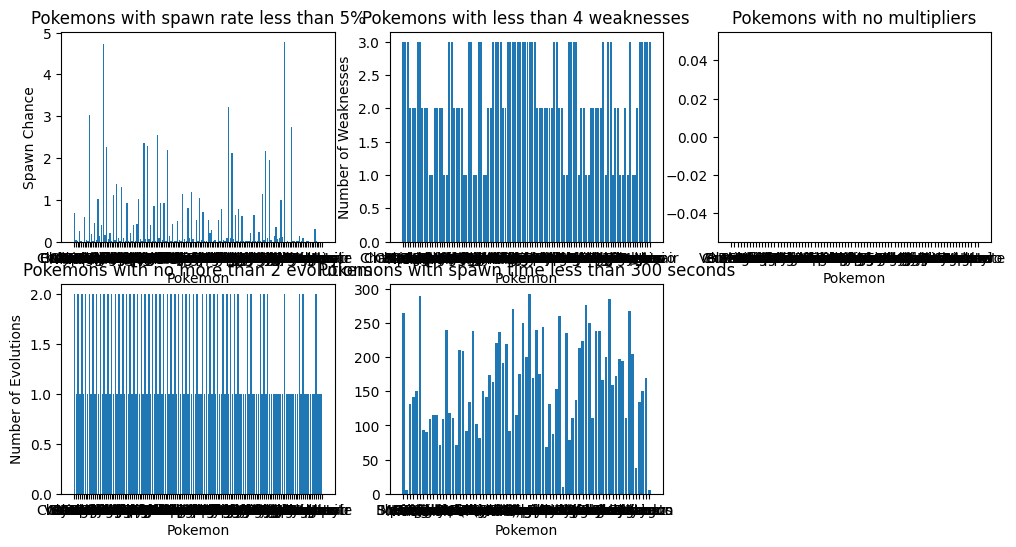

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv("pokemon_data.csv")

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df["spawn_chance"] < 5]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_5)

# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df["weaknesses"].apply(lambda x: len(str(x).split(","))) < 4]
print("Pokemons with less than 4 weaknesses:")
print(less_than_4_weaknesses)

# Get all Pokemons that have no multipliers at all
no_multipliers = df[df["multipliers"].isnull()]
print("Pokemons with no multipliers:")
print(no_multipliers)

# Get all Pokemons that do not have more than 2 evolutions
no_more_than_2_evolutions = df[df["next_evolution"].apply(lambda x: len(str(x).split(","))) <= 2]
print("Pokemons with no more than 2 evolutions:")
print(no_more_than_2_evolutions)

# Convert the spawn time to seconds for easier comparison
df["spawn_time_sec"] = df["spawn_time"].apply(lambda x: int(str(x).split(":")[0]) * 60 + int(str(x).split(":")[1])
                                               if pd.notnull(x) else np.nan)

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_less_than_300 = df[df["spawn_time_sec"] < 300]
print("Pokemons with spawn time less than 300 seconds:")
print(spawn_time_less_than_300)

# Get all Pokemon who have more than two types of capabilities
df["num_types"] = df["type"].apply(lambda x: len(str(x).split(",")))
more_than_2_types = df[df["num_types"] > 2]
print("Pokemons with more than two types of capabilities:")
print(more_than_2_types)

# Plot the analysis results
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.bar(spawn_rate_less_than_5["name"], spawn_rate_less_than_5["spawn_chance"])
plt.title("Pokemons with spawn rate less than 5%")
plt.xlabel("Pokemon")
plt.ylabel("Spawn Chance")

plt.subplot(2, 3, 2)
plt.bar(less_than_4_weaknesses["name"], less_than_4_weaknesses["weaknesses"].apply(lambda x: len(str(x).split(","))))
plt.title("Pokemons with less than 4 weaknesses")
plt.xlabel("Pokemon")
plt.ylabel("Number of Weaknesses")

plt.subplot(2, 3, 3)
plt.bar(no_multipliers["name"], [0] * len(no_multipliers))
plt.title("Pokemons with no multipliers")
plt.xlabel("Pokemon")

plt.subplot(2, 3, 4)
plt.bar(no_more_than_2_evolutions["name"], no_more_than_2_evolutions["next_evolution"].apply(lambda x: len(str(x).split(","))))
plt.title("Pokemons with no more than 2 evolutions")
plt.xlabel("Pokemon")
plt.ylabel("Number of Evolutions")

plt.subplot(2, 3, 5)
plt.bar(spawn_time_less_than_300["name"], spawn_time_less_than_300["spawn_time_sec"])
plt.title("Pokemons with spawn time less than 300 seconds")
plt.xlabel("Pokemon")

plt.show()


Pokemons with spawn rate less than 5%:
      id  num        name                                               img  \
0      1    1   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2    2     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3    3    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4    4  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5    5  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

            

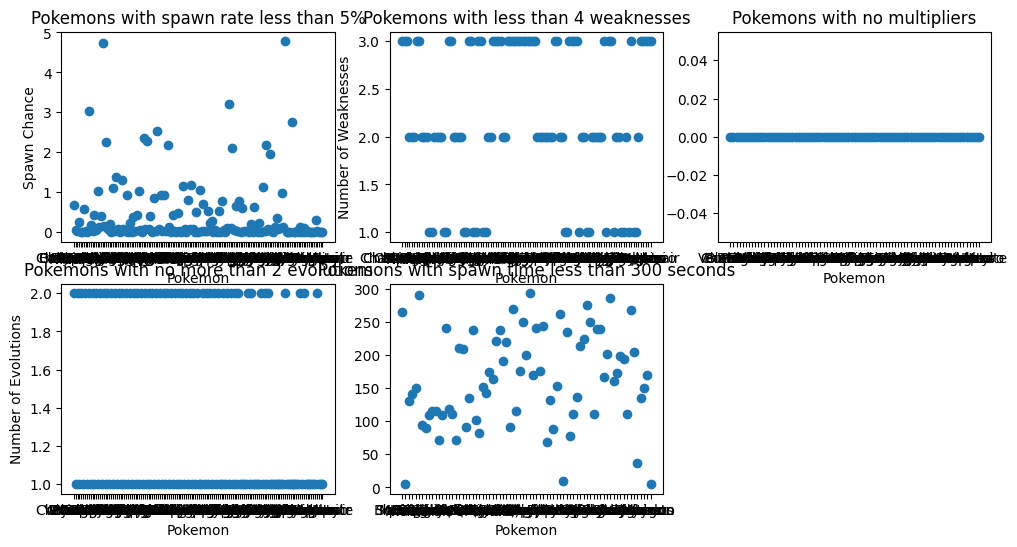

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv("pokemon_data.csv")

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df["spawn_chance"] < 5]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_5)

# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df["weaknesses"].apply(lambda x: len(str(x).split(","))) < 4]
print("Pokemons with less than 4 weaknesses:")
print(less_than_4_weaknesses)

# Get all Pokemons that have no multipliers at all
no_multipliers = df[df["multipliers"].isnull()]
print("Pokemons with no multipliers:")
print(no_multipliers)

# Get all Pokemons that do not have more than 2 evolutions
no_more_than_2_evolutions = df[df["next_evolution"].apply(lambda x: len(str(x).split(","))) <= 2]
print("Pokemons with no more than 2 evolutions:")
print(no_more_than_2_evolutions)

# Convert the spawn time to seconds for easier comparison
df["spawn_time_sec"] = df["spawn_time"].apply(lambda x: int(str(x).split(":")[0]) * 60 + int(str(x).split(":")[1])
                                               if pd.notnull(x) else np.nan)

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_less_than_300 = df[df["spawn_time_sec"] < 300]
print("Pokemons with spawn time less than 300 seconds:")
print(spawn_time_less_than_300)

# Get all Pokemon who have more than two types of capabilities
df["num_types"] = df["type"].apply(lambda x: len(str(x).split(",")))
more_than_2_types = df[df["num_types"] > 2]
print("Pokemons with more than two types of capabilities:")
print(more_than_2_types)

# Plot the analysis results
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.scatter(spawn_rate_less_than_5["name"], spawn_rate_less_than_5["spawn_chance"])
plt.title("Pokemons with spawn rate less than 5%")
plt.xlabel("Pokemon")
plt.ylabel("Spawn Chance")

plt.subplot(2, 3, 2)
plt.scatter(less_than_4_weaknesses["name"], less_than_4_weaknesses["weaknesses"].apply(lambda x: len(str(x).split(","))))
plt.title("Pokemons with less than 4 weaknesses")
plt.xlabel("Pokemon")
plt.ylabel("Number of Weaknesses")

plt.subplot(2, 3, 3)
plt.scatter(no_multipliers["name"], [0] * len(no_multipliers))
plt.title("Pokemons with no multipliers")
plt.xlabel("Pokemon")

plt.subplot(2, 3, 4)
plt.scatter(no_more_than_2_evolutions["name"], no_more_than_2_evolutions["next_evolution"].apply(lambda x: len(str(x).split(","))))
plt.title("Pokemons with no more than 2 evolutions")
plt.xlabel("Pokemon")
plt.ylabel("Number of Evolutions")

plt.subplot(2, 3, 5)
plt.scatter(spawn_time_less_than_300["name"], spawn_time_less_than_300["spawn_time_sec"])
plt.title("Pokemons with spawn time less than 300 seconds")
plt.xlabel("Pokemon")

plt.show()

In [ ]:
import requests
import csv

def download_and_convert_data(url):
    response = requests.get(url)

    if response.status_code == 200:
        json_data = response.json()

        attributes = ["id", "num", "name", "img", "type", "height", "weight", "candy", "candy_count",
                      "egg", "spawn_chance", "avg_spawns", "spawn_time", "multipliers", "weaknesses",
                      "next_evolution", "prev_evolution"]

        csv_file = "pokemon_data.csv"
        with open(csv_file, "w", newline="") as file:
            writer = csv.DictWriter(file, fieldnames=attributes)
            writer.writeheader()

            for pokemon in json_data["pokemon"]:
                # Check if the spawn_time attribute is a float
                if isinstance(pokemon["spawn_time"], float):
                    # Convert the float value to a string in the format "minutes:seconds"
                    pokemon["spawn_time"] = f'{int(pokemon["spawn_time"]):02d}:00'

                writer.writerow(pokemon)

        return csv_file
    else:
        print("Failed to download the data.")
        return None

url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

csv_file = download_and_convert_data(url)
if csv_file:
    print(f"Data downloaded and converted. Saved as {csv_file}.")


Data downloaded and converted. Saved as pokemon_data.csv.


Pokemons with spawn rate less than 5%:
      id  num        name                                               img  \
0      1    1   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2    2     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3    3    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4    4  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5    5  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

            

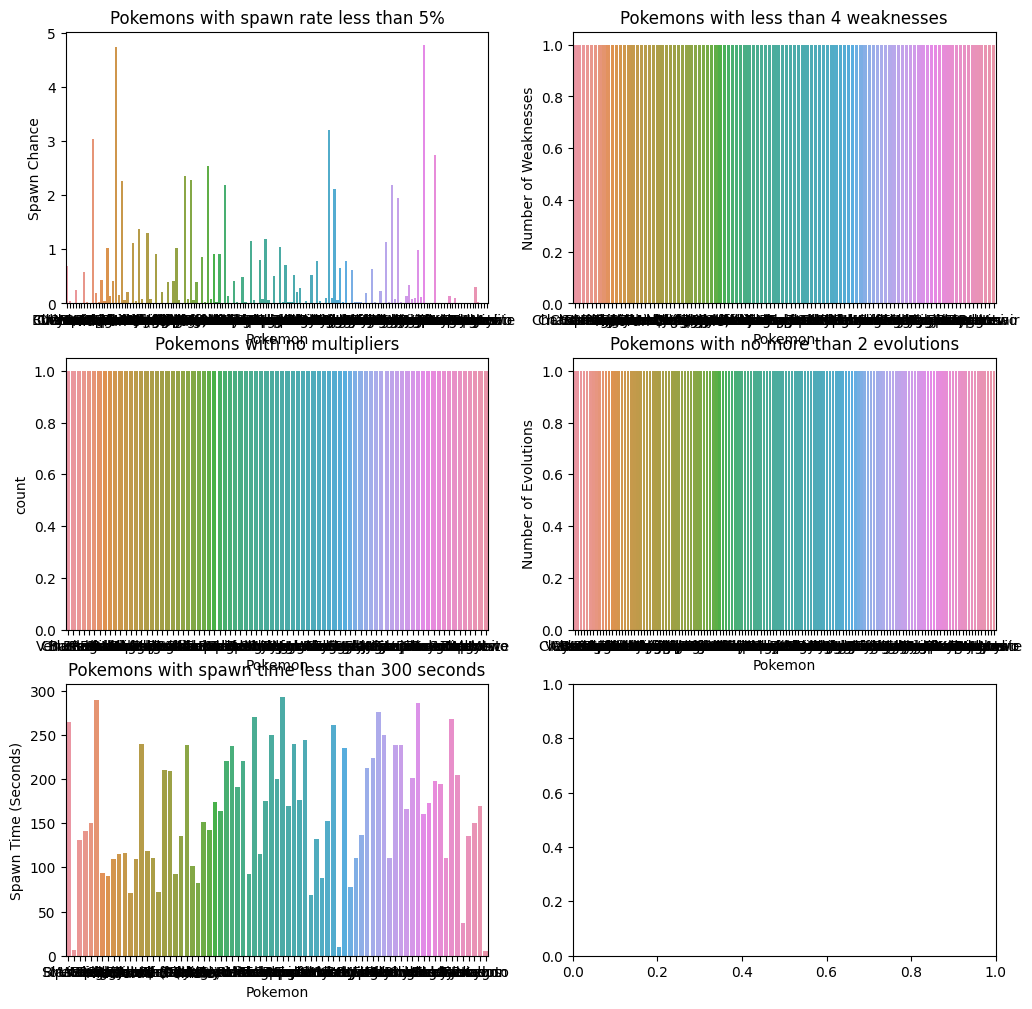

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
df = pd.read_csv("pokemon_data.csv")

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df["spawn_chance"] < 5]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_5)

# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df["weaknesses"].apply(lambda x: len(str(x).split(","))) < 4]
print("Pokemons with less than 4 weaknesses:")
print(less_than_4_weaknesses)

# Get all Pokemons that have no multipliers at all
no_multipliers = df[df["multipliers"].isnull()]
print("Pokemons with no multipliers:")
print(no_multipliers)

# Get all Pokemons that do not have more than 2 evolutions
no_more_than_2_evolutions = df[df["next_evolution"].apply(lambda x: len(str(x).split(","))) <= 2]
print("Pokemons with no more than 2 evolutions:")
print(no_more_than_2_evolutions)

# Convert the spawn time to seconds for easier comparison
df["spawn_time_sec"] = df["spawn_time"].apply(lambda x: int(str(x).split(":")[0]) * 60 + int(str(x).split(":")[1])
                                               if pd.notnull(x) else None)

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_less_than_300 = df[df["spawn_time_sec"] < 300]
print("Pokemons with spawn time less than 300 seconds:")
print(spawn_time_less_than_300)

# Get all Pokemon who have more than two types of capabilities
df["num_types"] = df["type"].apply(lambda x: len(str(x).split(",")))
more_than_2_types = df[df["num_types"] > 2]
print("Pokemons with more than two types of capabilities:")
print(more_than_2_types)

# Plot the analysis results
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
if not spawn_rate_less_than_5.empty:
    sns.barplot(data=spawn_rate_less_than_5, x="name", y="spawn_chance")
    plt.title("Pokemons with spawn rate less than 5%")
    plt.xlabel("Pokemon")
    plt.ylabel("Spawn Chance")

plt.subplot(3, 2, 2)
if not less_than_4_weaknesses.empty:
    sns.countplot(data=less_than_4_weaknesses, x="name")
    plt.title("Pokemons with less than 4 weaknesses")
    plt.xlabel("Pokemon")
    plt.ylabel("Number of Weaknesses")

plt.subplot(3, 2, 3)
if not no_multipliers.empty:
    sns.countplot(data=no_multipliers, x="name")
    plt.title("Pokemons with no multipliers")
    plt.xlabel("Pokemon")

plt.subplot(3, 2, 4)
if not no_more_than_2_evolutions.empty:
    sns.countplot(data=no_more_than_2_evolutions, x="name")
    plt.title("Pokemons with no more than 2 evolutions")
    plt.xlabel("Pokemon")
    plt.ylabel("Number of Evolutions")
    plt.subplot(3, 2, 5)
if not spawn_time_less_than_300.empty:
  sns.barplot(data=spawn_time_less_than_300, x="name", y="spawn_time_sec")
  plt.title("Pokemons with spawn time less than 300 seconds")
  plt.xlabel("Pokemon")
  plt.ylabel("Spawn Time (Seconds)")
  plt.subplot(3, 2, 6)
if not more_than_2_types.empty:
  sns.countplot(data=more_than_2_types, x="name")
  plt.title("Pokemons with more than two types of capabilities")
  plt.xlabel("Pokemon")
  plt.ylabel("Number of Types")
  plt.tight_layout()
  plt.show()


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

Earth meteorites that fell before the year 2000:
    Name of Earth Meteorite     id Meteorite     recclass  mass       year  \
0                    Aachen      1     Valid           L5   NaN 1880-01-01   
1                    Aarhus      2     Valid           H6   NaN 1951-01-01   
2                      Abee      6     Valid          EH4   NaN 1952-01-01   
3                  Acapulco     10     Valid  Acapulcoite   NaN 1976-01-01   
4                   Achiras    370     Valid           L6   NaN 1902-01-01   
..                      ...    ...       ...          ...   ...        ...   
994                Timochin  24004     Valid           H5   NaN 1807-01-01   
995                Tirupati  24009     Valid           H6   NaN 1934-01-01   
997                   Tjabe  24011     Valid           H6   NaN 1869-01-01   
998                Tjerebon  24012     Valid           L5   NaN 1922-01-01   
999               Tomakovka  24019     Valid          LL6   NaN 1905-01-01   

       reclat 

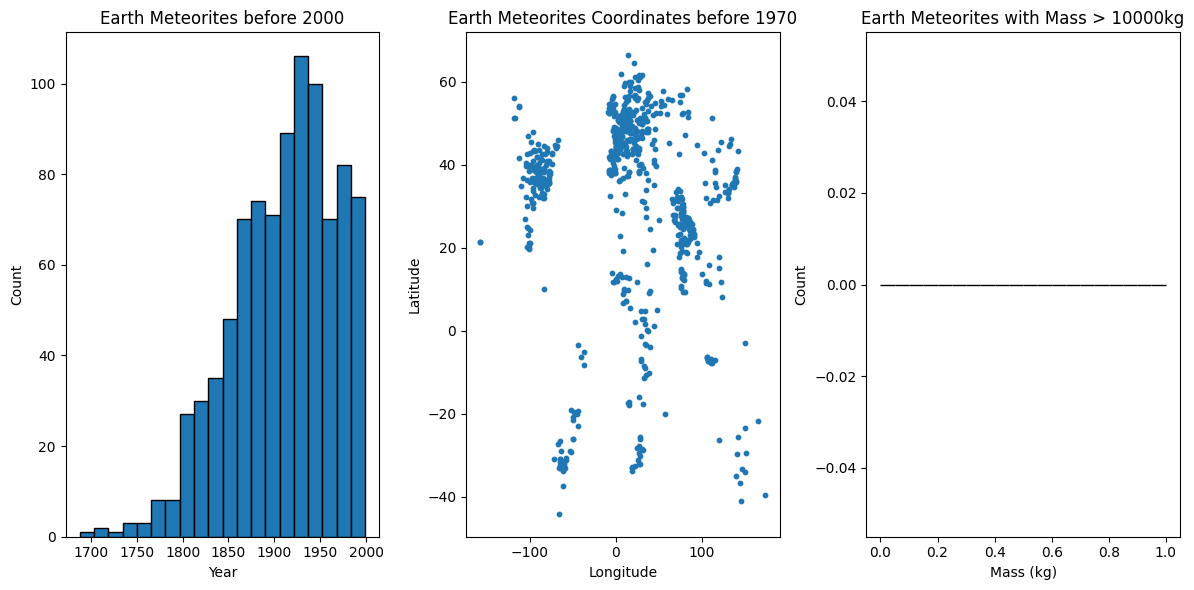

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv("/content/meteorite_data.csv")

# Convert the year column to datetime format
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[(df['reclat'].notnull()) & (df['year'].dt.year < 2000)]
print("Earth meteorites that fell before the year 2000:")
print(earth_meteorites_before_2000)

# Get all the earth meteorites coordinates that fell before the year 1970
earth_meteorites_coordinates_before_1970 = df[(df['reclat'].notnull()) & (df['year'].dt.year < 1970)]
print("Earth meteorites coordinates that fell before the year 1970:")
print(earth_meteorites_coordinates_before_1970)

# Get all earth meteorites with mass more than 10000kg (assuming mass is in kg)
earth_meteorites_mass_more_than_10000kg = df[(df['reclat'].notnull()) & (df['mass'] > 10000)]
print("Earth meteorites with mass more than 10000kg:")
print(earth_meteorites_mass_more_than_10000kg)

# Plot the analysis results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(earth_meteorites_before_2000['year'].dt.year, bins=20, edgecolor='black')
plt.title("Earth Meteorites before 2000")
plt.xlabel("Year")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.scatter(earth_meteorites_coordinates_before_1970['reclong'], earth_meteorites_coordinates_before_1970['reclat'], s=10)
plt.title("Earth Meteorites Coordinates before 1970")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.subplot(1, 3, 3)
plt.hist(earth_meteorites_mass_more_than_10000kg['mass'] / 1000, bins=20, edgecolor='black')
plt.title("Earth Meteorites with Mass > 10000kg")
plt.xlabel("Mass (kg)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
df

,Name of Earth Meteorite,id,Meteorite,recclass,mass,year,reclat,reclong,point coordinates
0,Aachen,1,Valid,L5,NaN,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,NaN,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,NaN,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,NaN,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,NaN,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]"
996,Tissint,54823,Valid,Martian (shergottite),NaN,2011-01-01,29.48195,-7.61123,"[-7.61123, 29.48195]"
997,Tjabe,24011,Valid,H6,NaN,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,NaN,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]"


Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

Overall ratings for each season:
season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64


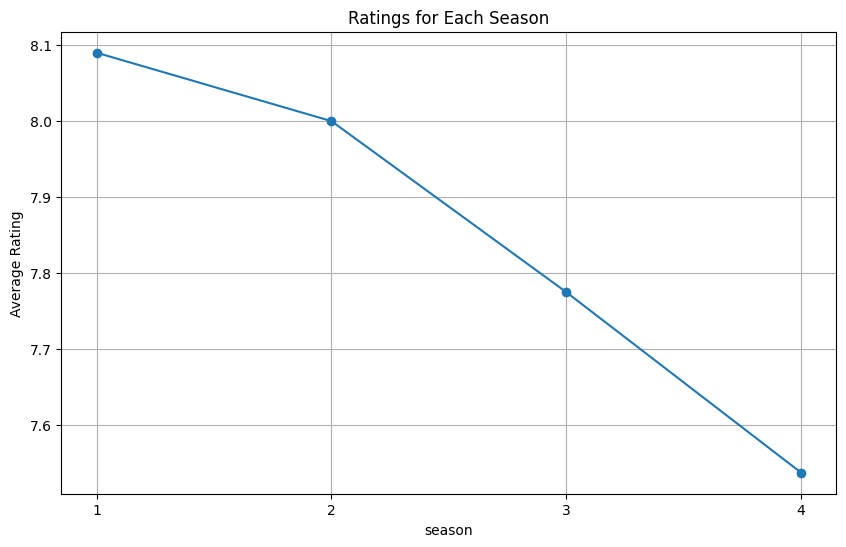

Episode names with average rating more than 8 for every season:
Series([], Name: name, dtype: object)
Episode names that aired before May 2019:
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object
Episode with the highest rating from each season:
    season                name
9        1  The Bicameral Mind
17       2             Kiksuya
20       3        Parce Domine
32       4      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv("/content/westworld_episodes.csv")

# Convert the airdate column to datetime format
df['airdate'] = pd.to_datetime(df['airdate'], errors='coerce')

# Get all the overall ratings for each season
season_ratings = df.groupby('season')['average_rating'].mean()
print("Overall ratings for each season:")
print(season_ratings)

# Plot the ratings for all the seasons
plt.figure(figsize=(10, 6))
plt.plot(season_ratings.index, season_ratings.values, marker='o')
plt.title("Ratings for Each Season")
plt.xlabel("season")
plt.ylabel("Average Rating")
plt.xticks(season_ratings.index)
plt.grid(True)
plt.show()

# Get all the episode names whose average rating is more than 8 for every season
high_rated_episodes = df.groupby(['season', 'name'])['average_rating'].mean().reset_index()
high_rated_episodes = high_rated_episodes[high_rated_episodes.groupby('season')['average_rating'].transform('min') > 8]
print("Episode names with average rating more than 8 for every season:")
print(high_rated_episodes['name'])

# Get all the episode names that aired before May 2019
episodes_before_may_2019 = df[df['airdate'] < '2019-05']
print("Episode names that aired before May 2019:")
print(episodes_before_may_2019['name'])

# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.groupby('season')['average_rating'].idxmax()
lowest_rated_episodes = df.groupby('season')['average_rating'].idxmin()
highest_rated_episodes_info = df.loc[highest_rated_episodes, ['season', 'name', 'average_rating']]
lowest_rated_episodes_info = df.loc[lowest_rated_episodes, ['season', 'name', 'average_rating']]
print("Episode with the highest rating from each season:")
print(highest_rated_episodes_info[['season', 'name']])
print("Episode with the lowest rating from each season:")
print(lowest_rated_episodes_info[['season', 'name']])

# Get the summary for the most popular (highest ratings) episode in every season
most_popular_episodes = df.groupby('season')['average_rating'].idxmax()
most_popular_episodes_info = df.loc[most_popular_episodes, ['season', 'name', 'average_rating', 'summary']]
print("Summary for the most popular episode in every season:")
print(most_popular_episodes_info[['season', 'name', 'summary']])


In [ ]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [ ]:
df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'runtime', 'average_rating', 'summary', 'medium_image_link',
       'original_image_link'],
      dtype='object')

Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [ ]:
import requests
import pandas as pd

# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_link)

# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data
    data = response.json()

    # Extract information about each episode
    episodes_data = data["_embedded"]["episodes"]
    episodes = []
    for episode_data in episodes_data:
        episode = {
            "id": episode_data["id"],
            "url": episode_data["url"],
            "name": episode_data["name"],
            "season": episode_data["season"],
            "number": episode_data["number"],
            "type": episode_data["type"],
            "airdate": episode_data["airdate"],
            "airtime": episode_data["airtime"],
            "runtime": episode_data["runtime"],
            "average_rating": episode_data["rating"]["average"],
            "summary": episode_data["summary"].replace("<p>", "").replace("</p>", ""),
            "medium_image_link": episode_data["image"]["medium"],
            "original_image_link": episode_data["image"]["original"]
        }
        episodes.append(episode)

    # Create a DataFrame from the extracted data
    df = pd.DataFrame(episodes)

    # Save the DataFrame to a CSV file
    csv_file = "westworld_episodes.csv"
    df.to_csv(csv_file, index=False)

    print(f"Data extracted and saved to {csv_file} successfully.")
else:
    print("Error: Failed to retrieve data from the API.")


Data extracted and saved to westworld_episodes.csv successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the provided link
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Print the column names
print("Column names:")
print(df.columns)

# Rest of the code for data analysis and insights
# ...


Column names:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []
TESLA cars with the model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []
Cars with an electric range of more than 100 and made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]


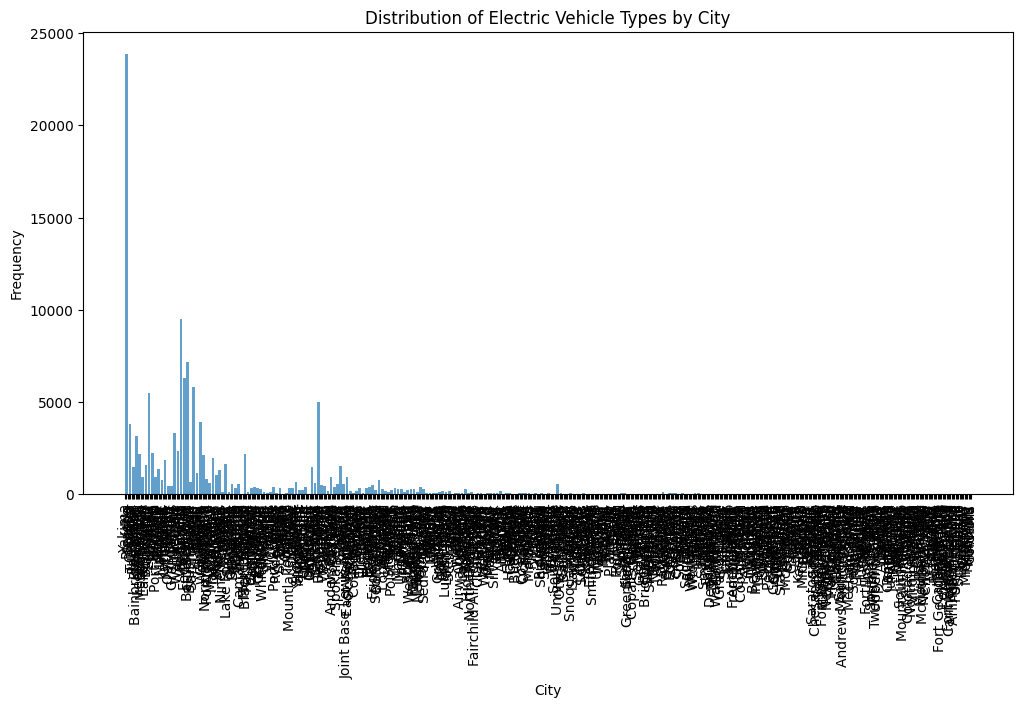

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
not_qualified_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No']
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(not_qualified_cars[['Make', 'Model']])

# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_in_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL')]
print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_in_bothell[['Model Year', 'Model']])

# Get all the cars that have an electric range of more than 100 and were made after 2015
cars_with_electric_range_gt_100 = df[(df['Electric Range'] > 100) & (df['Model Year'].astype(int) > 2015)]
print("Cars with an electric range of more than 100 and made after 2015:")
print(cars_with_electric_range_gt_100[['Make', 'Model']])

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))
plt.hist(df['City'].astype(str), bins='auto', alpha=0.7, rwidth=0.85)
plt.title("Distribution of Electric Vehicle Types by City")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []
TESLA cars with the model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []
Cars with an electric range of more than 100 and made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]


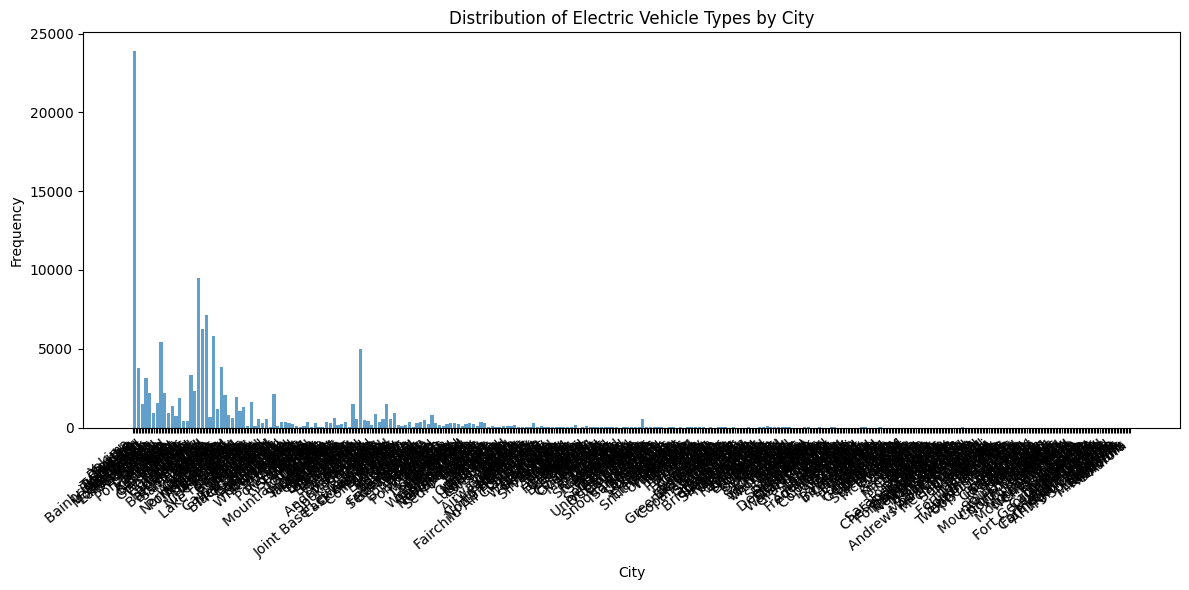

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
not_qualified_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No']
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(not_qualified_cars[['Make', 'Model']])

# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_in_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL')]
print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_in_bothell[['Model Year', 'Model']])

# Get all the cars that have an electric range of more than 100 and were made after 2015
cars_with_electric_range_gt_100 = df[(df['Electric Range'] > 100) & (df['Model Year'].astype(int) > 2015)]
print("Cars with an electric range of more than 100 and made after 2015:")
print(cars_with_electric_range_gt_100[['Make', 'Model']])

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))
plt.hist(df['City'].astype(str), bins='auto', alpha=0.7, rwidth=0.85)
plt.title("Distribution of Electric Vehicle Types by City")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.xticks(rotation=40, ha='right')  # Rotate and align x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [181]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Perform part-of-speech tagging on the words
    tagged_words = pos_tag(words)

    # Initialize counters for each part of speech
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0

    # Iterate over the tagged words and count the occurrences of each part of speech
    for word, tag in tagged_words:
        if tag.startswith('VB'):  # Verb tags start with 'VB'
            verb_count += 1
        elif tag.startswith('NN'):  # Noun tags start with 'NN'
            noun_count += 1
        elif tag.startswith('PR'):  # Pronoun tags start with 'PR'
            pronoun_count += 1
        elif tag.startswith('JJ'):  # Adjective tags start with 'JJ'
            adjective_count += 1

    # Create a dictionary with the counts
    pos_counts = {
        'verbs': verb_count,
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'adjectives': adjective_count
    }

    return pos_counts

# Example usage
text = "I have been running in the park."
counts = count_pos_tags(text)
print(counts)


{'verbs': 3, 'nouns': 1, 'pronouns': 1, 'adjectives': 0}


In [178]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [180]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True